<a href="https://colab.research.google.com/github/jsebastianquiroga/Semestre_3/blob/main/DL/Convolucion_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# LLAMAN LAS LIBRERIAS NECESARIAS

import os
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io

from matplotlib.image import imread

# sE CONECTA CON DRIVE PARA DESCARGAR IMAGEN DE 7X7X3

# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth

from oauth2client.client import GoogleCredentials 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Instalar la biblioteca Pillow
!pip install pillow

# Importar bibliotecas necesarias
from PIL import Image
import io

# Descargar la imagen desde Google Drive
image_id = '1syXUIzjd0eJft4zKUKVebDvYS3PK5_7-'
download = drive.CreateFile({'id': image_id})
download.GetContentFile('cuadrado7x7.jpg') # Guarda la imagen en un archivo temporal

# Leer la imagen y visualizarla
image = Image.open('cuadrado7x7.jpg')
image.show()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# se convierte en numpy para traer la tercera dimencion, la escala de color.
imagen = np.array(image)
imagen.shape

(7, 7, 3)

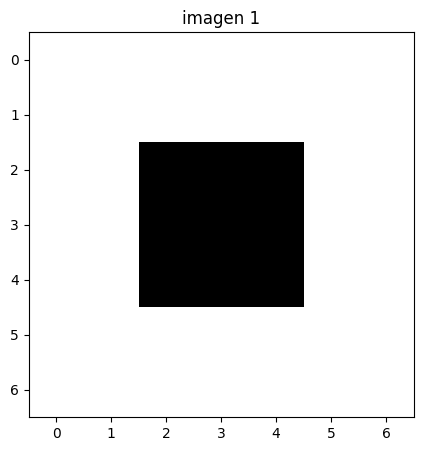

In [42]:
# plot inicial
plt.figure(figsize=(5,5))
plt.title('imagen 1')
plt.imshow(imagen)

In [48]:
#Se pasa a escala de grises para quitar tercera dimencion, queda 7X7X1
imagen_2 = color.rgb2gray(imagen)
imagenBN = imagen_2
print('Dimenciones matriz :', imagenBN.shape)
imagenBN

Dimenciones matriz : (7, 7)


array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

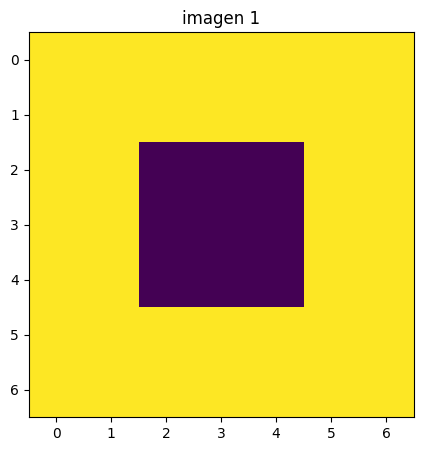

In [45]:
plt.figure(figsize=(5,5))
plt.title('imagen 1')
plt.imshow(imagenBN)

Se crea un kernel para demostrar el paso de la convolución.

In [49]:
kernel = np.array((
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
    ), dtype = 'float')

# Proceso convolución

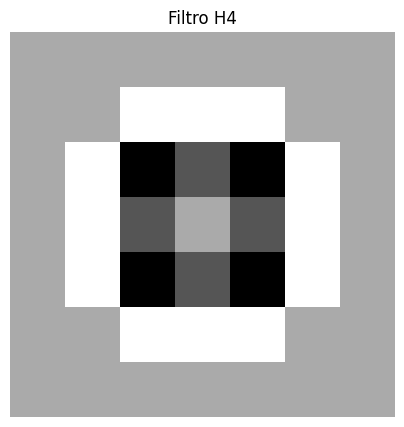

In [51]:
#

conv=signal.convolve2d(imagenBN , kernel, boundary='symm',mode='same')

plt.figure(figsize=(5,5))
plt.title("Filtro H4")
plt.axis('off')
plt.imshow(conv, cmap = 'gray')